In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df=pd.read_csv('/content/Spam Email Detection - spam.csv')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#dropping off non-corr columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
#renaming columns names
df.rename(columns={'v1':'Category','v2':'Email'},inplace=True)

In [12]:
df.sample(5)

,Category,Email
871,ham,Its going good...no problem..but still need li...
5254,ham,I didnt get anything da
1657,ham,S:-)if we have one good partnership going we w...
4366,ham,I like dis sweater fr mango but no more my siz...
5013,ham,Hello boytoy ! Geeee ... I'm missing you today...


In [13]:
df.isnull().sum()

Category    0
Email       0
dtype: int64

In [15]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.head(5)

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.loc[df['Category']=='spam','Category']==0
df.loc[df['Category']=='ham','Category']==1

0       False
1       False
3       False
4       False
6       False
        ...  
5565    False
5568    False
5569    False
5570    False
5571    False
Name: Category, Length: 4516, dtype: bool

In [21]:
X=df['Email']
y=df['Category']

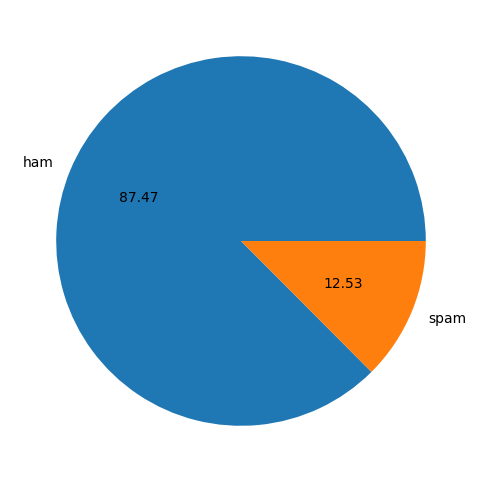

In [23]:
plt.figure(figsize=(10,6))
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
Feature_extraction=TfidfVectorizer(stop_words='english',min_df=1,lowercase=True)

In [31]:
X_train_features=Feature_extraction.fit_transform(X_train)
X_test_features=Feature_extraction.transform(X_test)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [33]:
X_train_features

<3614x6902 sparse matrix of type '<class 'numpy.float64'>'
	with 27920 stored elements in Compressed Sparse Row format>

In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [36]:
#making predictions
prediction=model.predict(X_test_features)

In [39]:
#getting accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9619109102646869


In [40]:
prediction_test=model.predict(X_test_features)

In [41]:
accuracy_test=accuracy_score(y_test,prediction_test)

In [42]:
accuracy_test

0.9619109102646869

In [43]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a"]
# convert text to feature vectors
input_data_features = Feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

[0]


In [ ]:
#here 0 means spam